In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
pd.set_option('display.max_columns', None)

In [79]:
grp_dict={
    'data':'first',
    'trip_creation_time':'last',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'source_name':'first',
    'destination_name' :'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'is_cutoff' : 'first',
    'cutoff_factor' :'max',
    'cutoff_timestamp' : 'first',
    'actual_distance_to_destination':'last',
    'actual_time' :'max',
    'osrm_time':'max',
    'osrm_distance':'max',
    'factor':'max',
    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum',
    'segment_factor':'max'
    
}

In [80]:
data = pd.read_csv('delhivery_data.csv')

In [82]:
grp_dict={
    'data':'first',
    'trip_creation_time':'last',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'source_name':'first',
    'destination_name' :'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'is_cutoff' : 'first',
    'cutoff_factor' :'max',
    'cutoff_timestamp' : 'first',
    'actual_distance_to_destination':'last',
    'actual_time' :'max',
    'osrm_time':'max',
    'osrm_distance':'max',
    'factor':'max',
    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum',
    'segment_factor':'max'
    
}

# New DataFrame for Analysis.

In [83]:
new_df = data.groupby(['trip_uuid','source_center','destination_center']).agg(grp_dict).reset_index()

In [85]:
new_df.drop('data',axis=1,inplace=True)

In [87]:
new_df.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,True,383,2018-09-13 12:40:43,383.759164,732.0,349.0,446.5496,2.275304,728.0,534.0,670.6205,10.066667
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,440,2018-09-12 14:56:29,440.973689,830.0,394.0,544.8027,2.862745,820.0,474.0,649.8528,7.333333
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,True,24,2018-09-12 02:41:24,24.644021,47.0,26.0,28.1994,1.807692,46.0,26.0,28.1995,2.142857
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,True,48,2018-09-12 01:39:28,48.542890,96.0,42.0,56.9116,2.285714,95.0,39.0,55.9899,6.666667
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,True,242,2018-09-14 16:54:36,237.439610,611.0,212.0,281.2109,2.882075,608.0,231.0,317.7408,9.821429


# Check for NULL Values

In [123]:
new_df.isna().sum()

trip_uuid                          0
source_center                      0
destination_center                 0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_name                       66
destination_name                  81
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
is_cutoff                          0
cutoff_factor                      0
cutoff_timestamp                   0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
factor                             0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
segment_factor                     0
dtype: int64

In [128]:
np.nan

nan

In [136]:
new_df['source_name'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(new_df['source_name']))
new_df['destination_name'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(new_df['destination_name']))

In [137]:
new_df.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

# Cleaned data 

In [104]:
data = pd.read_csv('cleaned_delhivery_data.csv')

In [105]:
data

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,True,383,2018-09-13 12:40:43,383.759164,732.0,349.0,446.5496,2.275304,728.0,534.0,670.6205,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,440,2018-09-12 14:56:29,440.973689,830.0,394.0,544.8027,2.862745,820.0,474.0,649.8528,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,True,24,2018-09-12 02:41:24,24.644021,47.0,26.0,28.1994,1.807692,46.0,26.0,28.1995,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,True,48,2018-09-12 01:39:28,48.542890,96.0,42.0,56.9116,2.285714,95.0,39.0,55.9899,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,True,242,2018-09-14 16:54:36,237.439610,611.0,212.0,281.2109,2.882075,608.0,231.0,317.7408,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,True,33,2018-10-04 03:17:33,33.627182,51.0,41.0,42.5213,1.243902,49.0,42.0,42.1431,1.384615,Tirchchndr,Shnmgprm,D (Tamil Nadu),Thisayanvilai,UdnkdiRD,D (Tamil Nadu),2018,10,3
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,True,33,2018-10-04 05:32:33,33.673835,90.0,48.0,40.6080,1.875000,89.0,77.0,78.5869,1.363636,Peikulam,SriVnktpm,D (Tamil Nadu),Tirunelveli,VdkkuSrt,I (Tamil Nadu),2018,10,3
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,True,12,2018-10-04 02:05:30,12.661945,30.0,

In [238]:
source_details = data['source_name'].apply(lambda x : x.split('_'))

In [239]:
destination_details = data['destination_name'].apply(lambda x : x.split('_'))

# Extracting city,place,code from provide feature

In [246]:
def get_features(source_details):
    """
    This Function will extract city,place,code from given feature
    """
    city=[]
    place=[]
    code=[]
    for sname in source_details:
        if(len(sname)==4):
    #         four_len.append(sname)
              city.append(sname[0])
              place.append(sname[1])
              code.append(sname[2]+sname[3])
        elif(len(sname)==3):
    #         three_len.append(sname)
              city.append(sname[0])
              place.append(sname[1])
              code.append(sname[2])
        elif(len(sname)==2):
    #         two_len.append(sname)
              city.append(sname[0])
              place.append(np.nan)
              code.append(sname[1])
        elif(len(sname)==1):
            city.append(np.nan)
            place.append(np.nan)
            code.append(sname[0])
    return city, place, code


In [243]:
source_city,source_place,source_code = get_features(source_details)

destination_city,destination_place,destination_code = get_features(destination_details)



In [244]:
data['source_city'] = source_city
data['source_place'] = source_place
data['source_code'] = source_code

data['destination_city'] = destination_city
data['destination_place'] = destination_place
data['destination_code'] = destination_code


In [245]:
data

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,True,383,2018-09-13 12:40:43,383.759164,732.0,349.0,446.5496,2.275304,728.0,534.0,670.6205,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana)
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,440,2018-09-12 14:56:29,440.973689,830.0,394.0,544.8027,2.862745,820.0,474.0,649.8528,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh)
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,True,24,2018-09-12 02:41:24,24.644021,47.0,26.0,28.1994,1.807692,46.0,26.0,28.1995,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka)
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,True,48,2018-09-12 01:39:28,48.542890,96.0,42.0,56.9116,2.285714,95.0,39.0,55.9899,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka)
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,True,242,2018-09-14 16:54:36,237.439610,611.0,212.0,281.2109,2.882075,608.0,231.0,317.7408,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,True,33,2018-10-04 03:17:33,33.627182,51.0,41.0,42.5213,1.243902,49.0,42.0,42.1431,1.384615,Tirchchndr,Shnmgprm,D (Tamil Nadu),Thisayanvilai,UdnkdiRD,D (Tamil Nadu)
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,True,33,2018-10-04 05:32:33,33.673835,90.0,48.0,40.6080,1.875000,89.0,77.0,78.5869,1.363636,Peikulam,SriVnktpm,D (Tamil Nadu),Tirunelveli,VdkkuSrt,I (Tamil Nadu)
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,True,12,2018-10-04 02:05:30,12.661945,30.0,14.0,16.0185,2.625000,29.0,14.0,16.0184,2.625000,Eral,Busstand,D (Tamil Nadu),Tirchchndr,Shnmgprm,D (Tamil Nadu)
26366,trip-1538611182701444

In [266]:
dates = data['trip_creation_time'].apply(lambda x: x.split(' ')[0])

In [267]:
df = pd.DataFrame(dates)

In [271]:
dates = df['trip_creation_time'].apply(lambda x: x.split('-'))

In [274]:
year=[]
month=[]
date=[]
for vals in dates:
    year.append(vals[0])
    month.append(vals[1])
    date.append(vals[2])

In [278]:
data['trip_creation_year'] = year
data['trip_creation_month'] = month
data['trip_creation_date'] = date

In [283]:
data['source_city'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['source_city']))
data['source_place'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['source_place']))
data['destination_city'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['destination_city']))
data['destination_place'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['destination_place']))

# Starting Analysis

In [179]:
data = pd.read_csv('cleaned_delhivery_data.csv')

In [180]:
data.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
source_city                       0
source_place                      0
source_code                       0
destination_city                  0
destination_place           

In [181]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,True,383,2018-09-13 12:40:43,383.759164,732.0,349.0,446.5496,2.275304,728.0,534.0,670.6205,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,440,2018-09-12 14:56:29,440.973689,830.0,394.0,544.8027,2.862745,820.0,474.0,649.8528,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,True,24,2018-09-12 02:41:24,24.644021,47.0,26.0,28.1994,1.807692,46.0,26.0,28.1995,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,True,48,2018-09-12 01:39:28,48.542890,96.0,42.0,56.9116,2.285714,95.0,39.0,55.9899,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,True,242,2018-09-14 16:54:36,237.439610,611.0,212.0,281.2109,2.882075,608.0,231.0,317.7408,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,9,12


In [182]:
data.shape

(26368, 32)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       26368 non-null  object 
 1   source_center                   26368 non-null  object 
 2   destination_center              26368 non-null  object 
 3   trip_creation_time              26368 non-null  object 
 4   route_schedule_uuid             26368 non-null  object 
 5   route_type                      26368 non-null  object 
 6   source_name                     26368 non-null  object 
 7   destination_name                26368 non-null  object 
 8   od_start_time                   26368 non-null  object 
 9   od_end_time                     26368 non-null  object 
 10  start_scan_to_end_scan          26368 non-null  float64
 11  is_cutoff                       26368 non-null  bool   
 12  cutoff_factor                   

In [184]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_year,trip_creation_month,trip_creation_date
count,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.0,26368.000000,26368.000000
mean,298.278671,92.026813,92.425217,200.690193,91.072853,115.252837,2.813548,198.863092,101.681318,125.423680,4.645282,2018.0,9.121701,18.405036
std,440.561588,209.476592,209.415035,384.853640,185.790830,254.069218,3.122130,381.283224,215.650948,285.932556,10.840957,0.0,0.326946,7.913996
min,20.000000,9.000000,9.001351,9.000000,6.000000,9.072900,0.387755,9.000000,6.000000,9.072900,0.407895,2018.0,9.000000,1.000000
25%,91.000000,21.000000,21.684419,51.000000,25.000000,27.839750,1.728814,50.000000,25.000000,28.471300,2.000000,2018.0,9.000000,14.000000
50%,152.000000,35.000000,35.114228,84.000000,39.000000,43.760400,2.153846,83.000000,42.000000,45.944400,2.727273,2018.0,9.000000,19.000000
75%,307.000000,66.000000,65.750726,168.000000,73.000000,86.467200,2.888889,166.000000,79.000000,91.351975,4.200000,2018.0,9.000000,25.000000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,4504.000000,1938.000000,2640.924700,574.250000,2018.0,10.000000,30.000000


# Univariate Analysis

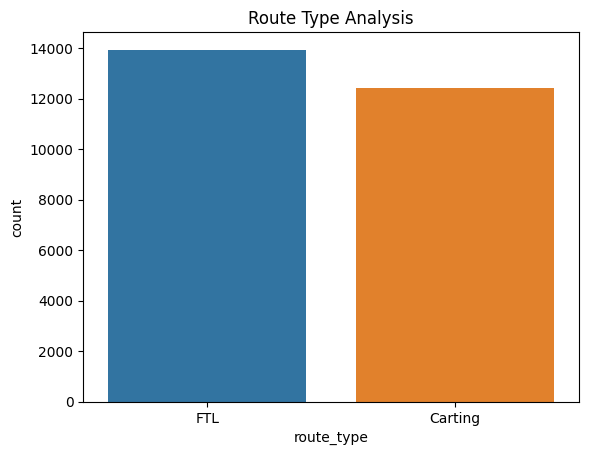

In [185]:
plt.title("Route Type Analysis")
sns.countplot(data=data,x = 'route_type')
plt.show()

In [186]:
def get_quartile_values(data,title):
    Q1,Q3 = np.percentile(data,[25,75])
    IQR = Q3-Q1
    left_wisker = Q1-(1.5)*IQR
    right_wisker = Q3+(1.5)*IQR
    plt.title("Outlier Detection for "+title+" Feature")
    sns.boxplot(data=data,orient='h')
    plt.show()

    return (Q1,Q3,left_wisker,right_wisker)

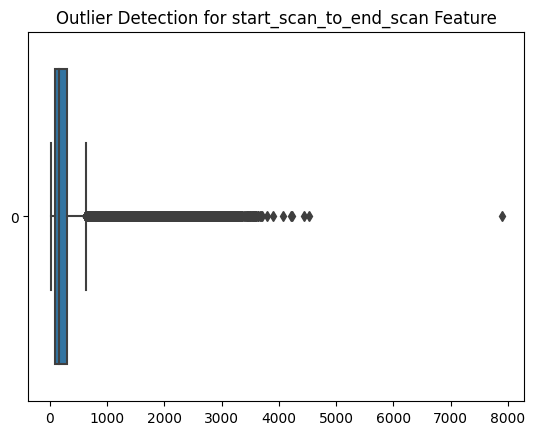

Q1: 91.0,Q3 : 307.0, left_wisker:-233.0,right_wisker:631.0


In [187]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['start_scan_to_end_scan'],'start_scan_to_end_scan')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

# Cleaned start_scan_to_end_scan feature after removing outliers

In [188]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['start_scan_to_end_scan'] = data.loc[(data['start_scan_to_end_scan'] >=leftwisker)&(data['start_scan_to_end_scan'] <=rightwisker)]['start_scan_to_end_scan']
data['start_scan_to_end_scan'] = np.log(data['start_scan_to_end_scan'])

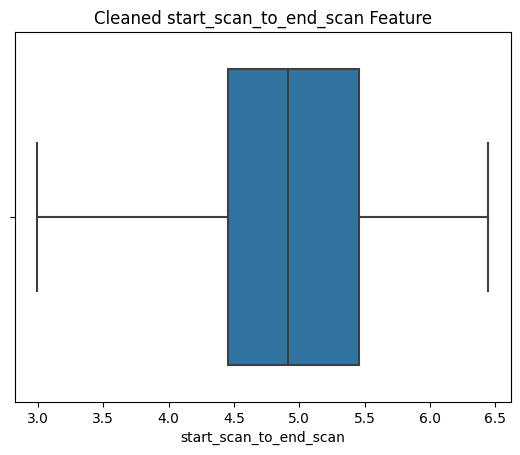

In [189]:
plt.title('Cleaned start_scan_to_end_scan Feature')
sns.boxplot(data=data,x='start_scan_to_end_scan')
plt.show()

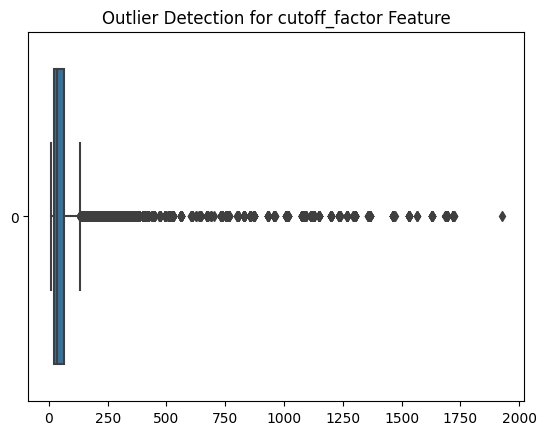

Q1: 21.0,Q3 : 66.0, left_wisker:-46.5,right_wisker:133.5


In [190]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['cutoff_factor'],'cutoff_factor')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [191]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['cutoff_factor'] = data.loc[(data['cutoff_factor'] >=leftwisker)&(data['cutoff_factor'] <=rightwisker)]['cutoff_factor']
data['cutoff_factor'] = np.log(data['cutoff_factor'])

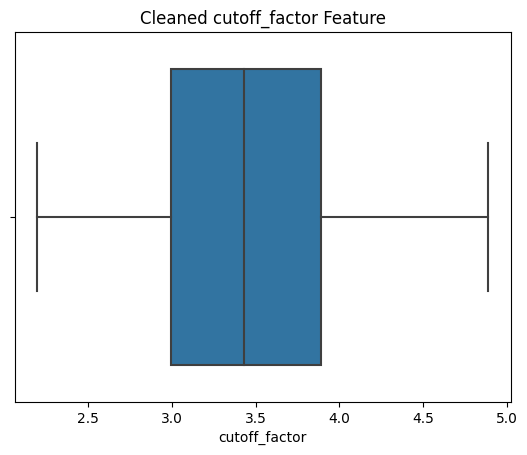

In [192]:
plt.title('Cleaned cutoff_factor Feature')
sns.boxplot(data=data,x='cutoff_factor')
plt.show()

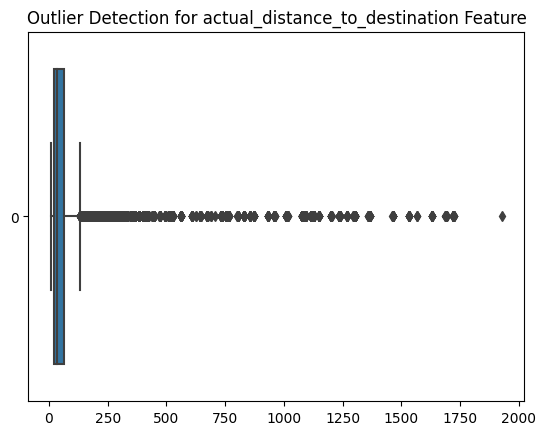

Q1: 21.684418968077466,Q3 : 65.75072642140785, left_wisker:-44.415042211918106,right_wisker:131.85018760140343


In [193]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['actual_distance_to_destination'],'actual_distance_to_destination')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [194]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['actual_distance_to_destination'] = data.loc[(data['actual_distance_to_destination'] >=leftwisker)&(data['actual_distance_to_destination'] <=rightwisker)]['actual_distance_to_destination']
data['actual_distance_to_destination'] = np.log(data['actual_distance_to_destination'])

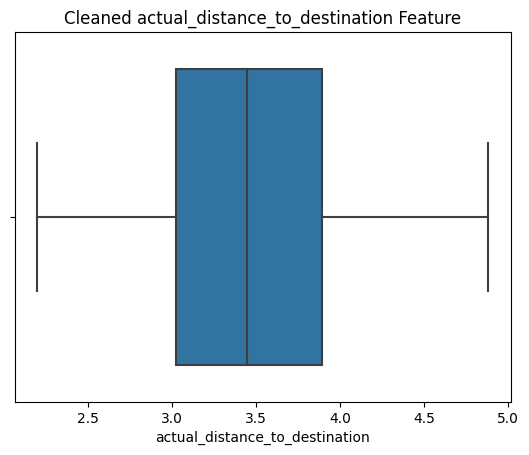

In [195]:
plt.title('Cleaned actual_distance_to_destination Feature')
sns.boxplot(data=data,x='actual_distance_to_destination')
plt.show()

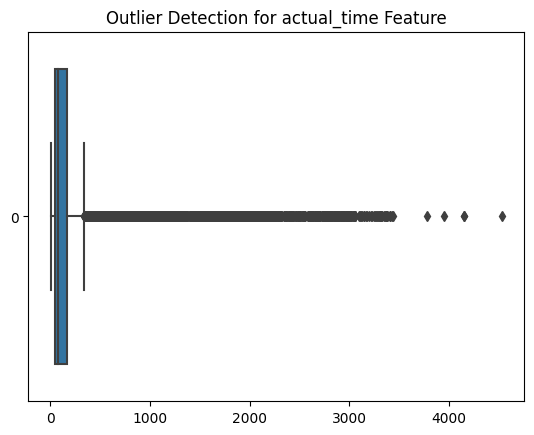

Q1: 51.0,Q3 : 168.0, left_wisker:-124.5,right_wisker:343.5


In [196]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['actual_time'],'actual_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [197]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['actual_time'] = data.loc[(data['actual_time'] >=leftwisker)&(data['actual_time'] <=rightwisker)]['actual_time']
data['actual_time'] = np.log(data['actual_time'])

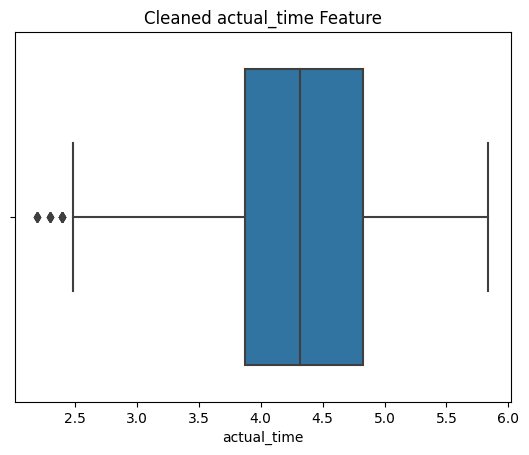

In [198]:
plt.title('Cleaned actual_time Feature')
sns.boxplot(data=data,x='actual_time')
plt.show()

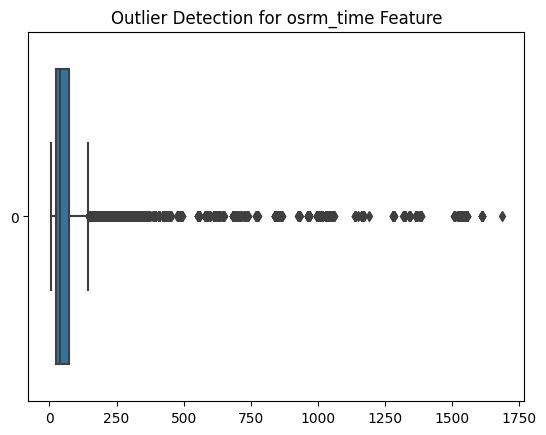

Q1: 25.0,Q3 : 73.0, left_wisker:-47.0,right_wisker:145.0


In [199]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['osrm_time'],'osrm_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [200]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['osrm_time'] = data.loc[(data['osrm_time'] >=leftwisker)&(data['osrm_time'] <=rightwisker)]['osrm_time']
data['osrm_time'] = np.log(data['osrm_time'])

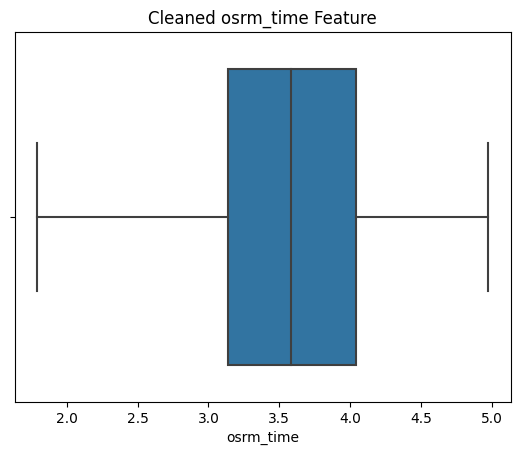

In [201]:
plt.title('Cleaned osrm_time Feature')
sns.boxplot(data=data,x='osrm_time')
plt.show()

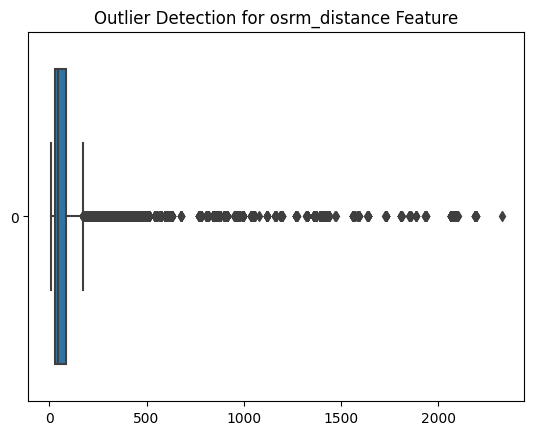

Q1: 27.839750000000002,Q3 : 86.46719999999999, left_wisker:-60.101424999999985,right_wisker:174.40837499999998


In [202]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['osrm_distance'],'osrm_distance')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [203]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['osrm_distance'] = data.loc[(data['osrm_distance'] >=leftwisker)&(data['osrm_distance'] <=rightwisker)]['osrm_distance']
data['osrm_distance'] = np.log(data['osrm_distance'])

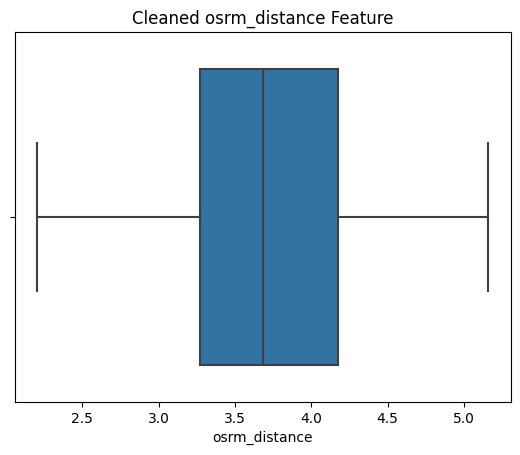

In [204]:
plt.title('Cleaned osrm_distance Feature')
sns.boxplot(data=data,x='osrm_distance')
plt.show()

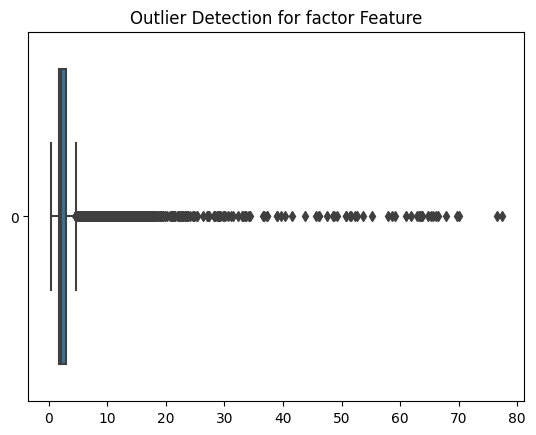

Q1: 1.728813559322034,Q3 : 2.888888888888889, left_wisker:-0.011299435028248483,right_wisker:4.629001883239171


In [205]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['factor'],'factor')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [206]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['factor'] = data.loc[(data['factor'] >=leftwisker)&(data['factor'] <=rightwisker)]['factor']
#data['factor'] = np.log(data['factor'])

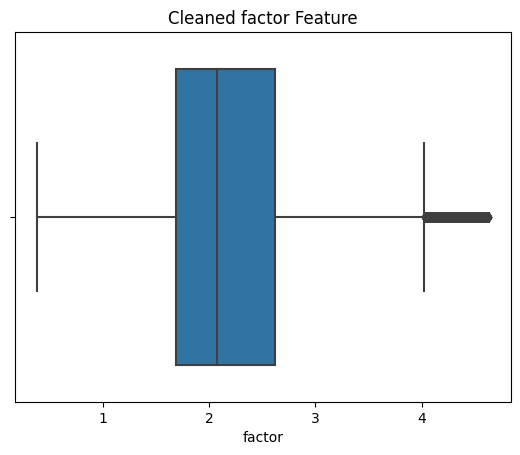

In [207]:
plt.title('Cleaned factor Feature')
sns.boxplot(data=data,x='factor')
plt.show()

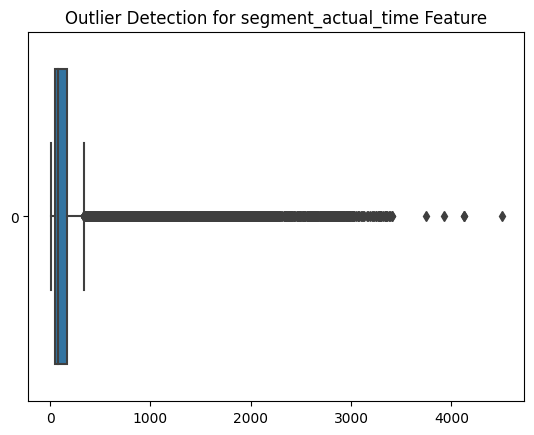

Q1: 50.0,Q3 : 166.0, left_wisker:-124.0,right_wisker:340.0


In [208]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_actual_time'],'segment_actual_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [209]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_actual_time'] = data.loc[(data['segment_actual_time'] >=leftwisker)&(data['segment_actual_time'] <=rightwisker)]['segment_actual_time']
#data['segment_actual_time'] = np.log(data['segment_actual_time'])

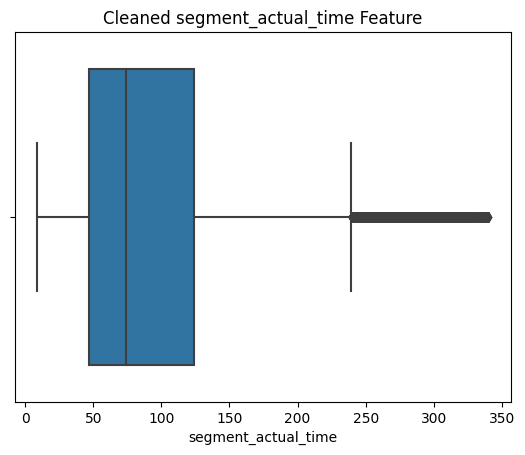

In [210]:
plt.title('Cleaned segment_actual_time Feature')
sns.boxplot(data=data,x='segment_actual_time')
plt.show()

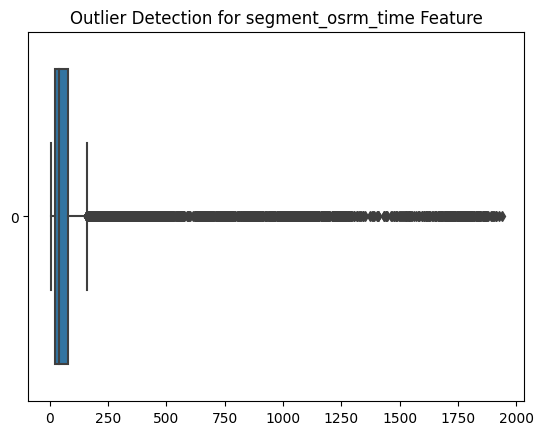

Q1: 25.0,Q3 : 79.0, left_wisker:-56.0,right_wisker:160.0


In [211]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_osrm_time'],'segment_osrm_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [212]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_osrm_time'] = data.loc[(data['segment_osrm_time'] >=leftwisker)&(data['segment_osrm_time'] <=rightwisker)]['segment_osrm_time']
data['segment_osrm_time'] = np.log(data['segment_osrm_time'])

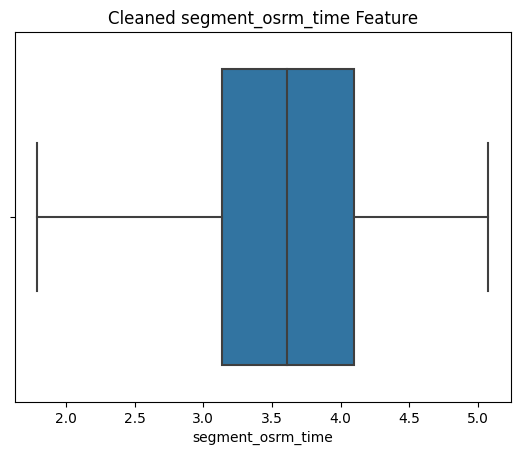

In [213]:
plt.title('Cleaned segment_osrm_time Feature')
sns.boxplot(data=data,x='segment_osrm_time')
plt.show()

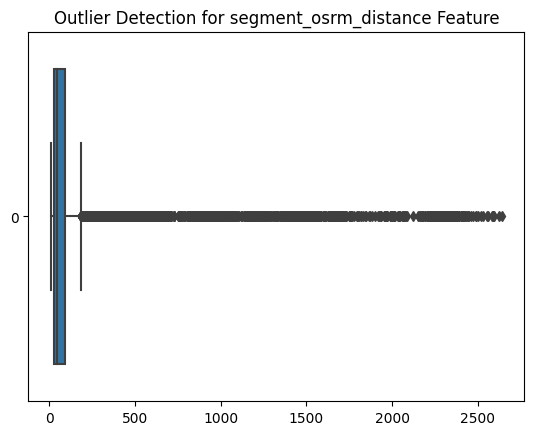

Q1: 28.4713,Q3 : 91.351975, left_wisker:-65.8497125,right_wisker:185.67298749999998


In [214]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_osrm_distance'],'segment_osrm_distance')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [216]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_osrm_distance'] = data.loc[(data['segment_osrm_distance'] >=leftwisker)&(data['segment_osrm_distance'] <=rightwisker)]['segment_osrm_distance']
data['segment_osrm_distance'] = np.log(data['segment_osrm_distance'])

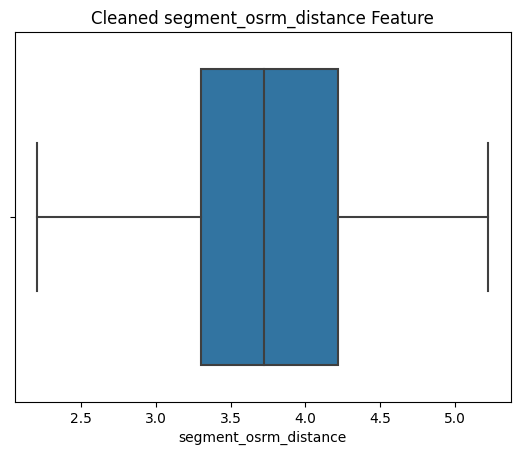

In [217]:
plt.title('Cleaned segment_osrm_distance Feature')
sns.boxplot(data=data,x='segment_osrm_distance')
plt.show()

In [218]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,NaN,True,NaN,2018-09-13 12:40:43,NaN,NaN,NaN,NaN,2.275304,NaN,NaN,NaN,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,NaN,True,NaN,2018-09-12 14:56:29,NaN,NaN,NaN,NaN,2.862745,NaN,NaN,NaN,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,4.060443,True,3.178054,2018-09-12 02:41:24,3.204534,3.850148,3.258097,3.339301,1.807692,46.0,3.258097,3.339304,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,4.804021,True,3.871201,2018-09-12 01:39:28,3.882448,4.564348,3.737670,4.041499,2.285714,95.0,3.663562,4.025171,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,NaN,True,NaN,2018-09-14 16:54:36,NaN,NaN,NaN,NaN,2.882075,NaN,NaN,NaN,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,9,12


# Check for NA Values after removing outliers

In [229]:
data.isna().sum()

trip_uuid                            0
source_center                        0
destination_center                   0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
source_name                          0
destination_name                     0
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan            2721
is_cutoff                            0
cutoff_factor                     3265
cutoff_timestamp                     0
actual_distance_to_destination    3292
actual_time                       3152
osrm_time                         2895
osrm_distance                     3071
factor                            2265
segment_actual_time               3155
segment_osrm_time                 3153
segment_osrm_distance             3106
segment_factor                       0
source_city                          0
source_place                         0
source_code              

In [232]:
data['start_scan_to_end_scan'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['start_scan_to_end_scan']))
data['cutoff_factor'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['cutoff_factor']))
data['actual_distance_to_destination'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['actual_distance_to_destination']))
data['actual_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['actual_time']))
data['osrm_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['osrm_time']))
data['osrm_distance'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['osrm_distance']))
data['factor'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['factor']))
data['segment_actual_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_actual_time']))
data['segment_osrm_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_osrm_time']))
data['segment_osrm_distance'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_osrm_distance']))

In [233]:
data.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
source_city                       0
source_place                      0
source_code                       0
destination_city                  0
destination_place           

In [234]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,4.968378,True,3.442997,2018-09-13 12:40:43,3.458508,4.351121,3.603283,3.723744,2.275304,95.626072,3.634931,3.762861,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,4.968378,True,3.442997,2018-09-12 14:56:29,3.458508,4.351121,3.603283,3.723744,2.862745,95.626072,3.634931,3.762861,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,9,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,4.060443,True,3.178054,2018-09-12 02:41:24,3.204534,3.850148,3.258097,3.339301,1.807692,46.000000,3.258097,3.339304,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,9,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,4.804021,True,3.871201,2018-09-12 01:39:28,3.882448,4.564348,3.737670,4.041499,2.285714,95.000000,3.663562,4.025171,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,9,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,4.968378,True,3.442997,2018-09-14 16:54:36,3.458508,4.351121,3.603283,3.723744,2.882075,95.626072,3.634931,3.762861,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,9,12


<AxesSubplot: xlabel='actual_time', ylabel='Count'>

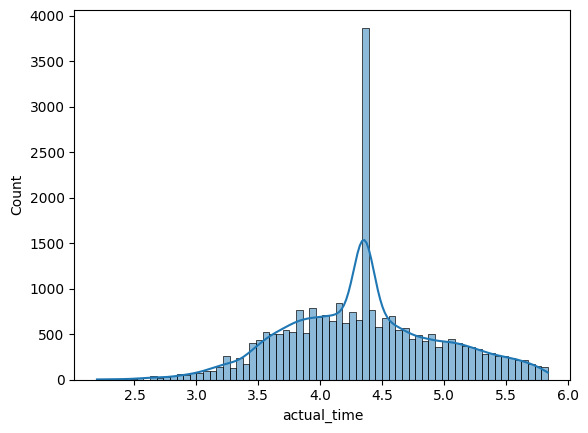

In [237]:
sns.histplot(data['actual_time'],kde=True)